In [2]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import sys
import cv2

In [43]:

model = YOLO('yolo12n.pt') 

In [44]:

dataset_path = Path('E:\Python\Data Science\Road VGG19\Dataset\data.yaml')

# Verify the data.yaml file exists
if not dataset_path.exists():
    print(f"Error: data.yaml not found at {dataset_path}")
    print("Please run prepare_dataset.py first")
    sys.exit(1)

In [45]:
# Verify dataset structure
required_dirs = [
    'E:\Python\Data Science\Road VGG19\Dataset/images/train',
    'E:\Python\Data Science\Road VGG19\Dataset/images/val',
    'E:\Python\Data Science\Road VGG19\Dataset/images/test',
    'E:\Python\Data Science\Road VGG19\Dataset/labels/train',
    'E:\Python\Data Science\Road VGG19\Dataset/labels/val',
    'E:\Python\Data Science\Road VGG19\Dataset/labels/test'
]
for dir_path in required_dirs:
    if not Path(dir_path).exists():
        print(f"Error: Required directory {dir_path} does not exist")
        print("Please run prepare_dataset.py first")
        sys.exit(1)

In [46]:
# Train the model
try:
    print("Starting training...")
    print(f"Using dataset at: {dataset_path.absolute()}")
    
    results = model.train(
        data=str(dataset_path),  # path to data.yaml file
        epochs=20,              # number of epochs
        imgsz=640,             # image size
        batch=16,              # batch size
        name='road_damage_detection',  # experiment name
        device='cpu'           # use CPU for training
    )
    print("Training completed successfully!")
    
except Exception as e:
    print(f"Error during training: {str(e)}")
    sys.exit(1)

Starting training...
Using dataset at: E:\Python\Data Science\Road VGG19\Dataset\data.yaml
Ultralytics 8.3.124  Python-3.10.11 torch-2.7.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolo12n.pt, data=E:\Python\Data Science\Road VGG19\Dataset\data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=road_damage_detection9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=Non

train: Scanning E:\Python\Data Science\Road VGG19\Dataset\labels\train.cache... 1025 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1025/1025 [00:00<?, ?it/s]

val: Fast image access  (ping: 0.10.1 ms, read: 144.844.9 MB/s, size: 114.9 KB)



e:\Python\Data Science\Road VGG19\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning E:\Python\Data Science\Road VGG19\Dataset\labels\val.cache... 292 images, 0 backgrounds, 0 corrupt: 100%|██████████| 292/292 [00:00<?, ?it/s]
e:\Python\Data Science\Road VGG19\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.2747      2.127      1.045          2        640: 100%|██████████| 65/65 [26:26<00:00, 24.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:56<00:00, 11.68s/it]

                   all        292        292      0.406      0.448      0.357      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G       0.28      1.276      1.017          2        640: 100%|██████████| 65/65 [24:38<00:00, 22.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:42<00:00, 10.26s/it]

                   all        292        292      0.419      0.783      0.589      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G       0.27      1.192     0.9953          1        640: 100%|██████████| 65/65 [22:45<00:00, 21.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:42<00:00, 10.22s/it]

                   all        292        292    0.00332      0.014   0.000796   0.000268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.2457      1.134     0.9762          4        640: 100%|██████████| 65/65 [22:57<00:00, 21.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:47<00:00, 10.73s/it]

                   all        292        292      0.659      0.717      0.788      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.2053      1.031     0.9499          4        640: 100%|██████████| 65/65 [22:12<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:45<00:00, 10.53s/it]

                   all        292        292      0.792      0.756      0.724      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      0.193     0.9469     0.9554          2        640: 100%|██████████| 65/65 [22:35<00:00, 20.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.43s/it]

                   all        292        292        0.8      0.787      0.857      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G     0.1646     0.8924      0.924          4        640: 100%|██████████| 65/65 [22:40<00:00, 20.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.31s/it]

                   all        292        292      0.702      0.747      0.766      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.1555      0.847     0.9334          4        640: 100%|██████████| 65/65 [22:16<00:00, 20.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.35s/it]

                   all        292        292      0.836      0.762      0.863      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.1407     0.8223     0.9368          3        640: 100%|██████████| 65/65 [22:47<00:00, 21.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:47<00:00, 10.76s/it]

                   all        292        292      0.876      0.804        0.9      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.1458     0.7777     0.9381          2        640: 100%|██████████| 65/65 [22:32<00:00, 20.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:43<00:00, 10.38s/it]

                   all        292        292      0.793      0.801      0.839      0.757


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


e:\Python\Data Science\Road VGG19\venv\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
      11/20         0G     0.1325     0.9623     0.9796          1        640: 100%|██████████| 65/65 [20:40<00:00, 19.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.45s/it]

                   all        292        292       0.77      0.861      0.885      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G    0.08457     0.7115     0.9234          1        640: 100%|██████████| 65/65 [20:52<00:00, 19.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:46<00:00, 10.66s/it]

                   all        292        292      0.813      0.832      0.902      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G    0.07124     0.6404     0.9257          1        640: 100%|██████████| 65/65 [21:03<00:00, 19.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.41s/it]

                   all        292        292      0.781      0.855      0.904      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G    0.05971     0.5806      0.921          1        640: 100%|██████████| 65/65 [21:42<00:00, 20.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.48s/it]

                   all        292        292      0.808      0.869      0.914      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G    0.05783     0.5786     0.9265          1        640: 100%|██████████| 65/65 [23:49<00:00, 21.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:47<00:00, 10.79s/it]

                   all        292        292      0.889      0.858      0.935      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G    0.04906     0.5257     0.9178          1        640: 100%|██████████| 65/65 [22:00<00:00, 20.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:47<00:00, 10.75s/it]

                   all        292        292      0.848      0.902      0.935      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G    0.04478     0.5069     0.9129          1        640: 100%|██████████| 65/65 [21:45<00:00, 20.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.50s/it]

                   all        292        292      0.884      0.911       0.94       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G    0.04422     0.4745     0.9106          1        640: 100%|██████████| 65/65 [24:22<00:00, 22.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:49<00:00, 10.92s/it]

                   all        292        292      0.872      0.857      0.941      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G    0.03481     0.4496     0.9119          1        640: 100%|██████████| 65/65 [22:33<00:00, 20.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:44<00:00, 10.47s/it]

                   all        292        292      0.904      0.886      0.945      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G    0.03159     0.4222       0.91          1        640: 100%|██████████| 65/65 [22:22<00:00, 20.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:46<00:00, 10.64s/it]

                   all        292        292      0.888      0.891      0.941      0.941



20 epochs completed in 8.146 hours.
Optimizer stripped from e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9\weights\last.pt, 5.5MB
Optimizer stripped from e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9\weights\best.pt, 5.5MB

Validating e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9\weights\best.pt...
Ultralytics 8.3.124  Python-3.10.11 torch-2.7.0+cpu CPU (AMD Ryzen 7 4700U with Radeon Graphics)
YOLOv12n summary (fused): 159 layers, 2,557,313 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:30<00:00,  9.06s/it]


                   all        292        292      0.903      0.886      0.945      0.945
                 Crack         95         95      0.941      0.926      0.961      0.961
               Pothole         79         79      0.933      0.835      0.946      0.946
       Surface Erosion        118        118      0.834      0.897      0.928      0.928
Speed: 5.9ms preprocess, 290.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to e:\Python\Data Science\Road VGG19\runs\detect\road_damage_detection9
Training completed successfully!


In [73]:
#Function to predict on new images
def predict_image(model, image_path):
    results = model(image_path)
    print(results)
    return results[0] 

In [74]:

def plot_predictions(image_path, results):
    plt.figure(figsize=(10, 10))
    plt.imshow(results.plot())
    plt.axis('off')
    plt.show()

In [80]:

test_image_path = Path('E:\Python\Data Science\Road VGG19\Dataset\images/test\97.jpg')
plot_predictions(test_image_path, results)

<Figure size 1000x1000 with 1 Axes>

In [ ]:
if test_image_path.exists():
    results = predict_image(model, test_image_path)
    plot_predictions(test_image_path, results)
    for r in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = r
        print(f"Detected class {int(class_id)} with confidence {score:.2f}")
else:
    print(f"Test image not found at {test_image_path}") 


image 1/1 E:\Python\Data Science\Road VGG19\Dataset\randomdata\download8.jpeg: 448x640 1 Pothole, 126.9ms
Speed: 2.5ms preprocess, 126.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


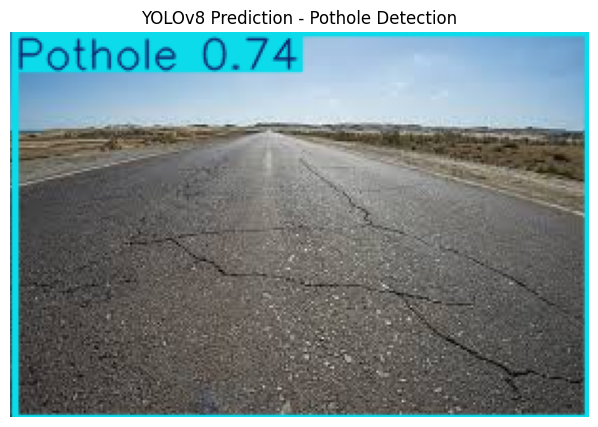

In [ ]:
# Load the trained model
model = YOLO("E:/Python/Data Science/Road VGG19/runs/detect/road_damage_detection9/weights/best.pt")

# Predict on an image
results = model.predict("E:\Python\Data Science\Road VGG19\Dataset/randomdata\download8.jpeg", save=False, show=False)
# Get the annotated image (with bounding boxes)
annotated_img = results[0].plot()  # returns a numpy array (BGR)

# Convert BGR to RGB for correct display in matplotlib
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Display it inline in Jupyter
plt.figure(figsize=(8, 5))
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.title("YOLOv8 Prediction - Pothole Detection")
plt.show()